In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.1 MB/s 
     |████████████████████████████████| 16.0 MB 38.9 MB/s 
     |████████████████████████████████| 40 kB 6.5 MB/s 
     |████████████████████████████████| 185 kB 68.0 MB/s 
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 237 kB 74.5 MB/s 
     |████████████████████████████████| 145 kB 71.8 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 1.7 MB 55.9 MB/s 
     |████████████████████████████████| 5.9 MB 41.4 MB/s 
     |████████████████████████████████| 438 kB 70.1 MB/s 
     |████████████████████████████████| 85 kB 5.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  At

In [ ]:
from tensorflow.keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import tensorflowjs as tfjs
import matplotlib.pyplot as plt

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


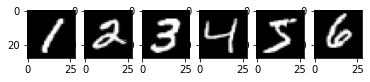

In [ ]:
# visualize data
plt.subplot(161)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(162)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(163)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(164)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(165)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(166)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
  
plt.show()

In [ ]:
# Normalize Inputs from 0–255 to 0–1
X_train = X_train / 255
X_test = X_test / 255
# One-Hot Encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = 10

In [ ]:
# training
x_train_simple = X_train.reshape(60000, 28 * 28).astype('float32')
x_test_simple = X_test.reshape(10000, 28 * 28).astype('float32')
model = Sequential()
model.add(Dense(28 * 28, input_dim=28 * 28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
        optimizer='adam', metrics=['accuracy'])
model.fit(x_train_simple, y_train, 
        validation_data=(x_test_simple, y_test))

1875/1875 [==============================] - 8s 3ms/step - loss: 0.1898 - accuracy: 0.9431 - val_loss: 0.0916 - val_accuracy: 0.9720


In [ ]:
# save model
model.save("model.h5")

In [ ]:
# convert model into tensorflow.js format
!tensorflowjs_converter --input_format keras /content/model.h5 /content/mnist-model

2022-10-22 02:45:53.339109: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 02:45:53.983025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 02:45:53.983158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-22 02:45:53.983192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

In [ ]:
!zip -r /content/mnist_model.zip /content/mnist-model

  adding: content/mnist-model/ (stored 0%)
  adding: content/mnist-model/group1-shard1of1.bin (deflated 8%)
  adding: content/mnist-model/model.json (deflated 69%)


In [ ]:
from google.colab import files
files.download("/content/mnist_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>